In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import  metrics

%matplotlib inline


In [2]:
import os
working_directory=os.getcwd()
print (working_directory)

/Users/anisha/DL assignment


In [4]:
path=working_directory + '/slr06.csv'
data=pd.read_csv(path)
data.head(50)
print(data)

      X      Y
0   108  392.5
1    19   46.2
2    13   15.7
3   124  422.2
4    40  119.4
..  ...    ...
58    9   87.4
59   31  209.8
60   14   95.5
61   53  244.6
62   26  187.5

[63 rows x 2 columns]


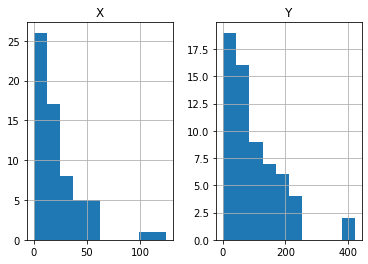

In [5]:
data.hist();

In [6]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values


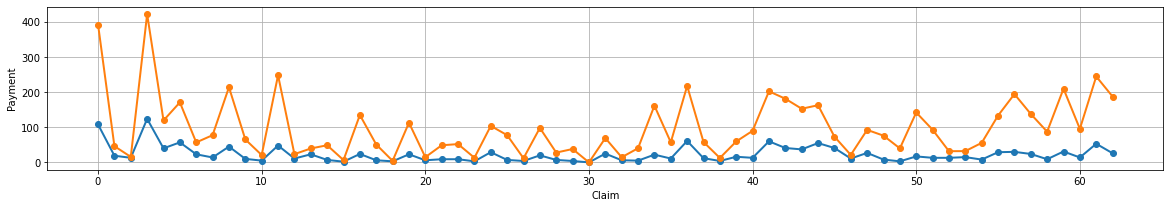

In [7]:
import matplotlib.pyplot as plt


y1 = data.X
y2 = data.Y

plt.rcParams["figure.figsize"] = (20,3)

plt.plot(y1, linewidth = '2', marker = 'o')
plt.plot(y2, linewidth = '2', marker = 'o')

plt.xlabel("Claim")
plt.ylabel("Payment")

plt.grid()
plt.show()

<AxesSubplot:title={'center':'Distribution of label Y i.e. Total Payment for Corresponding claims'}, xlabel='Y', ylabel='Density'>

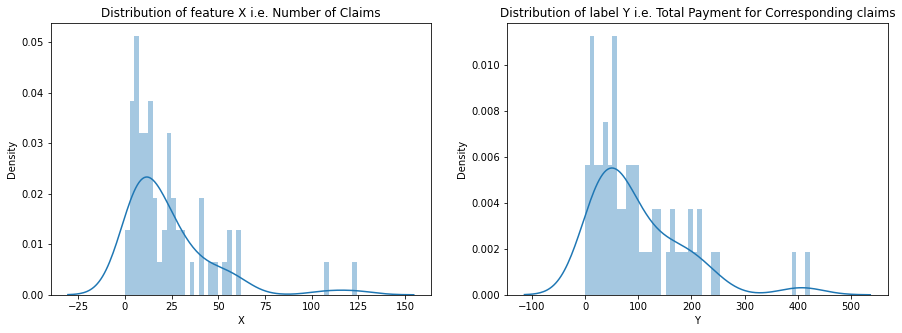

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.set_title('Distribution of feature X i.e. Number of Claims')
sns.distplot(data.X,bins=50,ax=ax1)

ax2.set_title('Distribution of label Y i.e. Total Payment for Corresponding claims')
sns.distplot(data.Y,bins=50,ax=ax2)

In [9]:
correlations = data.corr(method='pearson')
print(correlations)

          X         Y
X  1.000000  0.912878
Y  0.912878  1.000000


In [10]:
skew = data.skew()
print(skew)

X    2.316240
Y    1.627071
dtype: float64


<AxesSubplot:title={'center':'Violinplot for X'}, ylabel='X'>

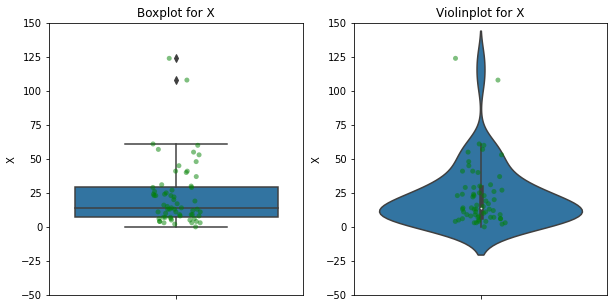

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.set_ylim(-50,150)
ax1.set_title('Boxplot for X')
sns.boxplot(y='X',data=data,ax=ax1,)
sns.stripplot(y='X',color='green',data=data,jitter=True,ax=ax1,alpha=0.5)

ax2.set_ylim(-50,150)
ax2.set_title('Violinplot for X')
sns.violinplot(y='X',data=data,ax=ax2)
sns.stripplot(y='X',color='green',data=data,jitter=True,ax=ax2,alpha=0.5)


<AxesSubplot:title={'center':'Scatter plot between feature and Label'}, xlabel='X', ylabel='Y'>

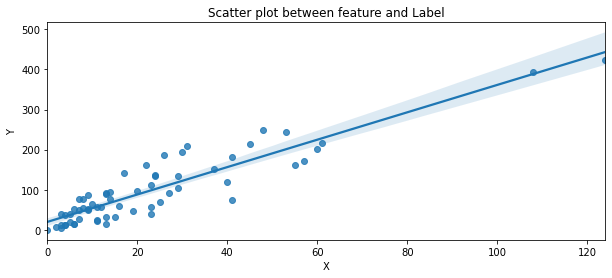

In [12]:
fig , (ax1) = plt.subplots(1,1,figsize=(10,4))

ax1.set_title('Scatter plot between feature and Label')
sns.regplot(data=data,x='X',y='Y',ax=ax1)


In [13]:
from sklearn import  metrics
from sklearn import linear_model
X = pd.DataFrame(data.X)
Y = data.Y
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
mse = metrics.mean_squared_error(Y_pred,Y)


In [14]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 1/3, random_state = 0)


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)


LinearRegression()

In [16]:
Y_Pred = regressor.predict(X_Test)

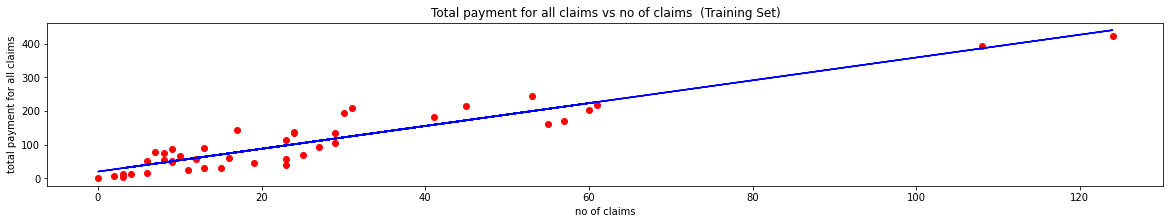

In [17]:
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Total payment for all claims vs no of claims  (Training Set)')
plt.xlabel('no of claims')
plt.ylabel('total payment for all claims')
plt.show()

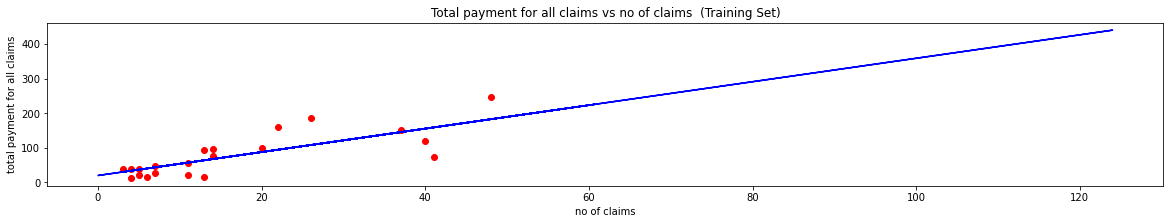

In [18]:
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue')
plt.title('Total payment for all claims vs no of claims  (Training Set)')
plt.xlabel('no of claims')
plt.ylabel('total payment for all claims')
plt.show()

In [19]:
regressor.score(X, Y)

0.8332482311879938